# RENFE

## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## PROJECT RENFE: PREPARAR EL DATASET PARA LA PREDICCION DE PRECIOS DE LOS BILLETES DE RENFE

In [1]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
# para procesar numerico: MinMaxScaler (mas usado)
import folium
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor

import pickle

from sklearn import metrics


In [2]:
#leemos el fichero de renfe
df_renfe=pd.read_csv("dataset/renfe.csv",sep=";")
df_renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [3]:
'''PREGUNTA 2
2. ¿Puedes decir en cuáles variables existen nulos?
'''
df_renfe.isnull().any()

FECHA_CONSULTA    False
FECHA_INICIO      False
FECHA_FIN         False
CIUDAD_ORIGEN     False
CIUDAD_DESTINO    False
TIPO_TREN         False
TIPO_TARIFA        True
CLASE              True
PRECIO             True
dtype: bool

In [4]:
'''PREGUNTA 3
3. Hagamos un df_renfe.info(), ¡Marca todas las INCORRECTAS!
'''
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       383568 non-null  object 
 6   TIPO_TARIFA     382225 non-null  object 
 7   CLASE           382225 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [5]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 3############
for i in ["FECHA_CONSULTA","FECHA_INICIO","FECHA_FIN"]:
    df_renfe[i]=pd.to_datetime(df_renfe[i])
#####################################

In [6]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383568 non-null  datetime64[ns]
 1   FECHA_INICIO    383568 non-null  datetime64[ns]
 2   FECHA_FIN       383568 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383568 non-null  object        
 4   CIUDAD_DESTINO  383568 non-null  object        
 5   TIPO_TREN       383568 non-null  object        
 6   TIPO_TARIFA     382225 non-null  object        
 7   CLASE           382225 non-null  object        
 8   PRECIO          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 26.3+ MB


In [ ]:
'''PREGUNTA 4'''
##########PREGUNTA 4. INTERPRETAR EL CODIGO (1)############
df_renfe["TIEMPO_VIAJE"]=(df_renfe["FECHA_FIN"]-df_renfe["FECHA_INICIO"])/np.timedelta64(1,'m')
df_renfe["DIF_INI_BUS"]=(df_renfe["FECHA_INICIO"]-df_renfe["FECHA_CONSULTA"])/np.timedelta64(1,'m')
#####################################

In [ ]:
'''PREGUNTA 5'''
'''Hacer un histograma de la columna "DIF_INI_BUS", ¿Qué se puede deducir?'''
df_renfe["DIF_INI_BUS"].hist()

In [ ]:
'''REALIZAR LO COMENTADO EN LA PREGUNTA 5'''
'''HINT: SI SE QUIERE BORRAR SE PUEDE USAR EL .dro([condicion].index)'''
df_renfe.drop(df_renfe[df_renfe["DIF_INI_BUS"]<=0].index, axis=0,inplace=True)

In [ ]:
'''PREGUNTA 6
6. ¿Existen filas duplicadas?¿Cuantas filas son?
'''
len(df_renfe[df_renfe.duplicated()])

In [ ]:
'''SI EXISTEN DUPLICADOS BORRARLOS Y LLAMAR AL DF: df_renfe_sin_duplicados, SINO EXISTE NO CREAR UN NUEVO DATAFRAME'''
df_renfe_sin_duplicados = df_renfe.copy(deep=True)
df_renfe_sin_duplicados.drop_duplicates(inplace=True)

In [ ]:
'''PREGUNTA 7
7. Luego de eliminar los duplicados, ¿Aún existen nulos?
'''
df_renfe_sin_duplicados.reset_index(drop=True,inplace=True)


In [ ]:
df_renfe_sin_duplicados.isnull().sum()

In [ ]:
'''PREGUNTA 8'''
##########PREGUNTA 8. INTERPRETAR EL CODIGO (2º)############
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    df_renfe_sin_duplicados[col + '_HORA'] = df_renfe_sin_duplicados[col].dt.hour
    df_renfe_sin_duplicados[col + '_NOMBREDIA'] = df_renfe_sin_duplicados[col].dt.day_name()
    ##O .dt.weekday_name
    df_renfe_sin_duplicados[col + '_DIA'] = df_renfe_sin_duplicados[col].dt.day
    df_renfe_sin_duplicados[col + '_MES'] = df_renfe_sin_duplicados[col].dt.month
    
    del df_renfe_sin_duplicados[col]

df_renfe_sin_duplicados.head()
#####################################

In [ ]:
df_renfe_sin_duplicados.info()

In [ ]:
'''PREGUNTA 9
9. En el precio existen nulos, ¿Qué porcentaje representa del total del dataset?
'''
porcentaje = ( 100 * (df_renfe_sin_duplicados["PRECIO"].isna().sum()) )/ 382863
porcentaje

In [ ]:
df_renfe_sin_duplicados.shape

In [ ]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 9############
###VAMOS A BORRAR LOS PRECIOS CON 0####
df_renfe_sin_duplicados.drop(df_renfe_sin_duplicados[df_renfe_sin_duplicados["PRECIO"]==0].index, axis=0, inplace=True)
#####################################



In [ ]:
'''PREGUNTA 10
10. Qué sería lo más adecuado hacer con el precio, la clase y la tarifa de tren? 
hint: no probar df["clase"].mean...
'''


In [ ]:
'''EN CASO ELEGIR HACER UN TRATAMIENTO DE NULOS REALIZARLO
HINT: EN CASO DE QUERER HACER UNA MODA RECORDAR UTILIZAR UN [0] AL FINAL PARA OBTENER EL VALOR DE LA MODA
HINT2: EN CASO DE QUERE ELIMINAR NULOS DE UNA COLUMNA INVESTIGAR LA FUNCION dropna'''

# sacar el valor de la columna (de tipo categorica) que mas va de moda
#df_renfe_sin_duplicados["CLASE"].mode()[0]

df_renfe_sin_duplicados["CLASE"].fillna(df_renfe_sin_duplicados["CLASE"].mode()[0], inplace=True)
df_renfe_sin_duplicados["TIPO_TARIFA"].fillna(df_renfe_sin_duplicados["TIPO_TARIFA"].mode()[0], inplace=True)

# borramos valores nulo de columna PRECIO
df_renfe_sin_duplicados.dropna(subset=["PRECIO"], inplace=True)

In [ ]:
df_renfe_sin_duplicados.reset_index(drop=True, inplace=True)

In [ ]:
df_renfe_sin_duplicados.info()

In [ ]:
df_renfe_sin_duplicados.isnull().sum()

In [ ]:
df_renfe_sin_duplicados.head()

In [ ]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 10############
df_renfe_sin_duplicados.drop(["FECHA_CONSULTA_HORA","FECHA_CONSULTA_DIA","FECHA_CONSULTA_MES","FECHA_CONSULTA_NOMBREDIA"],axis=1, inplace=True)
df_renfe_clean= df_renfe_sin_duplicados.copy(deep=True)

latitud_longitud=pd.read_csv("ETL/LAT_LONG_CIUDADES.csv", sep=";")
latitud_longitud
#####################################

In [ ]:
'''PREGUNTA 11'''
##########PREGUNTA 11. INTERPRETAR EL CODIGO (3)############
df_renfe_clean_1=pd.merge(df_renfe_clean,latitud_longitud, how='left',left_on=["CIUDAD_ORIGEN"],right_on=["PROVINCIA"])
df_renfe_clean_1


df_renfe_clean_1.info()
df_renfe_clean_2=pd.merge(df_renfe_clean_1,latitud_longitud, how='left', \
        suffixes=('_ORIGEN', '_DESTINO'), left_on=["CIUDAD_DESTINO"],right_on=["PROVINCIA"])


df_renfe_clean_2
df_renfe_clean_2.drop(["PROVINCIA_DESTINO","PROVINCIA_ORIGEN"],axis=1,inplace=True)

df_renfe_clean_2.shape

#####################################

In [ ]:
df_renfe_clean_2.head()

In [ ]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 11############
## Gráfico evolutivo del precio por clase
#df_renfe_clean_2.info()
grafico_horizontal= df_renfe_clean_2.groupby(["CLASE","FECHA_INICIO_MES"])["PRECIO"].mean().reset_index()
grafico_horizontal

evolucion_horizontal= px.bar(grafico_horizontal, x="FECHA_INICIO_MES", y="PRECIO", \
                        color="CLASE", orientation="v", color_discrete_sequence=px.colors.cyclical.mygbm)

evolucion_horizontal.show()

##################################

In [ ]:
'''PREGUNTA 12
12. Elaborar un gráfico evolutivo mensual por tipo de tren, 
mencionar en JULIO(7) el precio mensual del AVE-TGV
'''
# en lugar de CLASE el TIPO DE TREN

grafico_horizontal2= df_renfe_clean_2.groupby(["TIPO_TREN","FECHA_INICIO_MES"])["PRECIO"].mean().reset_index()
grafico_horizontal2

evolucion_horizontal2= px.bar(grafico_horizontal2, x="FECHA_INICIO_MES", y="PRECIO", \
                        color="TIPO_TREN", orientation="v", color_discrete_sequence=px.colors.cyclical.mygbm)

evolucion_horizontal2.show()



In [ ]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 12############
df_renfe_clean_2.info()
mapa_datos = df_renfe_clean_2.groupby(['CIUDAD_ORIGEN', 'LATITUD_ORIGEN','LONGITUD_ORIGEN'])["PRECIO"].mean().reset_index()

mapa_global2 = folium.Map(location=[40.416705, -3.703582], tiles='cartodbpositron',
               min_zoom=4, max_zoom=8, zoom_start=6)

for i in range(0, len(mapa_datos)):
    folium.Circle(
        location=[mapa_datos.iloc[i]['LATITUD_ORIGEN'], mapa_datos.iloc[i]['LONGITUD_ORIGEN']],
        color='crimson', 
        tooltip ='<li><bold>Ciudad : '+str(mapa_datos.iloc[i]['CIUDAD_ORIGEN'])+
                 '<li><bold>Precio medio : '+str(mapa_datos.iloc[i]['PRECIO']),
        radius=int(mapa_datos.iloc[i]['PRECIO'])**2.5).add_to(mapa_global2)

mapa_global2

##################################

In [ ]:
'''PREGUNTA 13
13. Mapa donde muestre las ciudades destino y su tiempo medio de viaje, 
¿Qué ciudad tiene el mayor tiempo medio?
'''

df_renfe_clean_2.info()
mapa_datos = df_renfe_clean_2.groupby(['CIUDAD_DESTINO', 'LATITUD_DESTINO','LONGITUD_DESTINO'])["TIEMPO_VIAJE"].mean().reset_index()

mapa_global2 = folium.Map(location=[40.416705, -3.703582], tiles='cartodbpositron',
               min_zoom=4, max_zoom=8, zoom_start=6)

for i in range(0, len(mapa_datos)):
    folium.Circle(
        location=[mapa_datos.iloc[i]['LATITUD_DESTINO'], mapa_datos.iloc[i]['LONGITUD_DESTINO']],
        color='crimson', 
        tooltip ='<li><bold>Ciudad : '+str(mapa_datos.iloc[i]['CIUDAD_DESTINO'])+
                 '<li><bold>Tiempo medio viaje : '+str(mapa_datos.iloc[i]['TIEMPO_VIAJE']),
        radius=int(mapa_datos.iloc[i]['TIEMPO_VIAJE'])**2).add_to(mapa_global2)

mapa_global2


In [ ]:
# pickle = 

outfile=open("dataset_renfe_clean2","wb")

In [ ]:
# vamos a grabar el fichero hasta el punto que estamos
pickle.dump(df_renfe_clean_2,outfile)

In [ ]:
outfile.close()

In [5]:
# cargamo el nuevo fichero 

fichero=open("dataset_renfe_clean2","rb")

# asignamo a una var el pickle (fichero)

df_renfe_clean_2=pickle.load(fichero)

In [6]:
fichero.close()

In [7]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 13############
df_renfe_prep= df_renfe_clean_2.copy(deep=True)
df_renfe_prep.drop(["LATITUD_DESTINO","LONGITUD_DESTINO","LATITUD_ORIGEN","LONGITUD_ORIGEN"],axis=1, inplace=True)
##################################

In [8]:
'''PREGUNTA 14
14. Mapa de correlación: ¿Existe alguna variable muy correlacionada?
'''
df_renfe_prep.corr(method='pearson')


,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_DIA,FECHA_FIN_MES
PRECIO,1.000000,-0.236016,-0.241403,0.050322,0.032571,-0.187192,-0.011565,0.032091,-0.187222
TIEMPO_VIAJE,-0.236016,1.000000,0.018014,-0.182723,-0.006737,-0.000012,0.097962,-0.006541,0.000185
DIF_INI_BUS,-0.241403,0.018014,1.000000,0.003963,-0.029987,0.450893,0.008700,-0.030371,0.450979
FECHA_INICIO_HORA,0.050322,-0.182723,0.003963,1.000000,0.002841,-0.003478,0.715822,0.002805,-0.002653
FECHA_INICIO_DIA,0.032571,-0.006737,-0.029987,0.002841,1.000000,-0.293927,0.001468,0.996105,-0.293129
FECHA_INICIO_MES,-0.187192,-0.000012,0.450893,-0.003478,-0.293927,1.000000,-0.004544,-0.293022,0.999825
FECHA_FIN_HORA,-0.011565,0.097962,0.008700,0.715822,0.001468,-0.004544,1.000000,0.001556,-0.005986
FECHA_FIN_DIA,0.032091,-0.006541,-0.030371,0.002805,0.996105,-0.293022,0.001556,1.000000,-0.293849
FECHA_FIN_MES,-0.187222,0.000185,0.450979,-0.002653,-0.293129,0.999825,-0.005986,-0.293849,1.000000


In [9]:
#Si hay alguna correlación...borrarlo!
del(df_renfe_prep["FECHA_FIN_DIA"])

In [10]:
#Si hay alguna correlación...borrarlo!
del(df_renfe_prep["FECHA_FIN_MES"])

array([[<AxesSubplot:title={'center':'PRECIO'}>]], dtype=object)

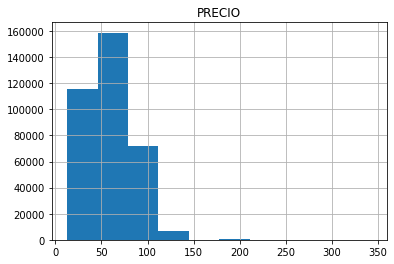

In [12]:
'''PREGUNTA 15
15. ¿Se puede hacer algo con la distribución del precio?
'''

df_renfe_prep.hist(column="PRECIO")

In [20]:
df_renfe_prep.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,LOG_PRECIO
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,20,Friday,28,6,23,Friday,1.827369
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,10,Sunday,14,7,13,Sunday,2.032216
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,13,Thursday,23,5,16,Thursday,1.674861
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,14,Wednesday,29,5,22,Wednesday,1.452553
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,13,Wednesday,26,6,16,Wednesday,1.824451


array([[<AxesSubplot:title={'center':'LOG_PRECIO'}>]], dtype=object)

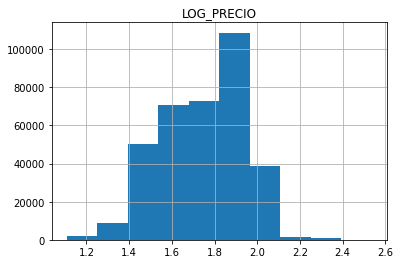

In [13]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 15############
df_renfe_prep["LOG_PRECIO"]=np.log10(df_renfe_prep["PRECIO"])
df_renfe_prep.hist(column="LOG_PRECIO")


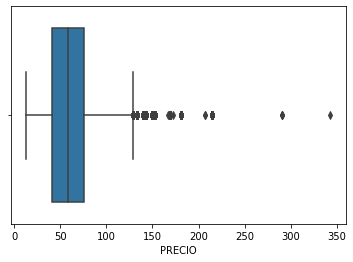

In [15]:
outliers_precio2 = sns.boxplot(x=df_renfe_prep["PRECIO"])

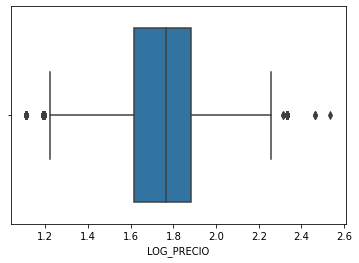

In [14]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 15############
outliers_precio2 = sns.boxplot(x=df_renfe_prep["LOG_PRECIO"])

In [ ]:
#A continuación vamos a analizar la variable que queremos predecir PRECIO como se comporta frente a las demás variables#

<AxesSubplot:xlabel='CIUDAD_ORIGEN', ylabel='PRECIO'>

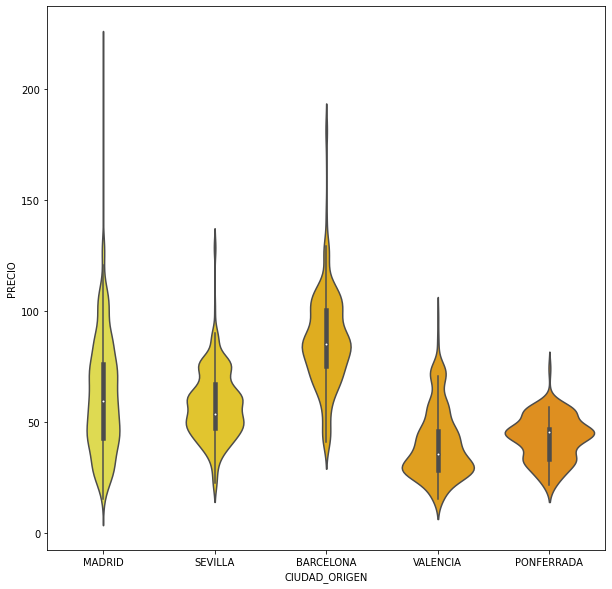

In [16]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 15############
#Relación CIUDAD_ORIGEN vs PRECIO
muestra=pd.DataFrame(df_renfe_prep.sample(frac=0.01, random_state=1))
muestra.shape

plt.figure(figsize=(10,10))
sns.violinplot(x="CIUDAD_ORIGEN",y="PRECIO", data=muestra, palette="Wistia")

<AxesSubplot:xlabel='FECHA_INICIO_NOMBREDIA', ylabel='PRECIO'>

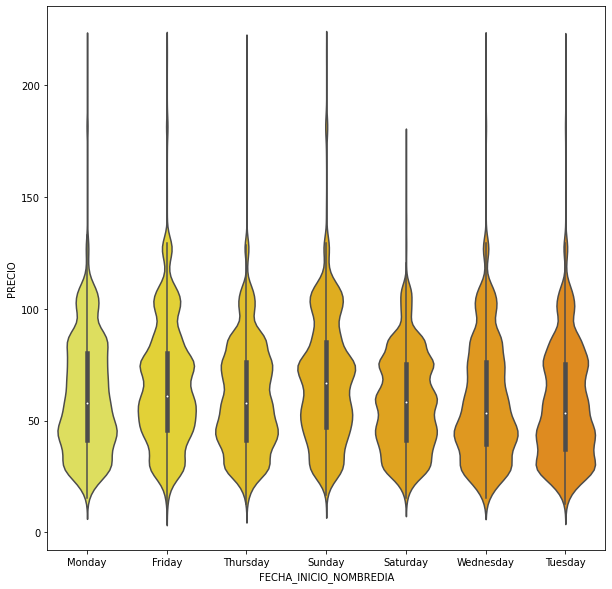

In [22]:
'''PREGUNTA 16
16. Relación del Día de inicio de viaje y el precio, 
¿Hay algún día que muestre mayor tendencia a un precio más barato?
'''

muestra1=pd.DataFrame(df_renfe_prep.sample(frac=0.10, random_state=1))
muestra1.shape

plt.figure(figsize=(10,10))
sns.violinplot(x="FECHA_INICIO_NOMBREDIA",y="PRECIO", data=muestra1, palette="Wistia")

In [ ]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 16############
##Scatterplot de precio vs fecha inicio
plt.figure(figsize=(10,10))
sns.scatterplot(x="FECHA_INICIO_DIA", y="PRECIO",data=muestra)
####################################

<AxesSubplot:xlabel='TIEMPO_VIAJE', ylabel='PRECIO'>

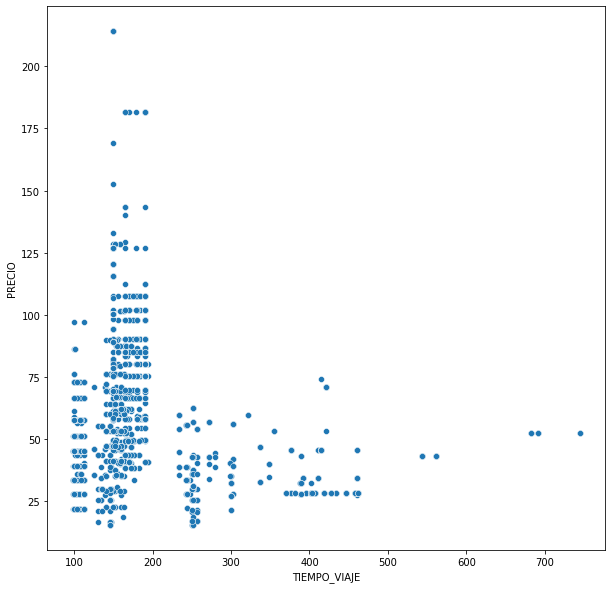

In [23]:
'''PREGUNTA 17
17. Relación del tiempo de duración del viaje y el precio ¿Ves alguna relación?
'''

plt.figure(figsize=(10,10))
sns.scatterplot(x="TIEMPO_VIAJE", y="PRECIO",data=muestra)

In [24]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 17############
# crea nuevo df
df_renfe_prep.head()
df_renfe_prep2=df_renfe_prep.copy(deep=True)

target=["PRECIO","LOG_PRECIO"]

def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="int8") and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype=="object")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

lista_numericas,lista_boolean,lista_categoricas=obtener_lista_variables(df_renfe_prep2)

lista_categoricas
####################################

['CIUDAD_ORIGEN',
 'CIUDAD_DESTINO',
 'TIPO_TREN',
 'TIPO_TARIFA',
 'CLASE',
 'FECHA_INICIO_NOMBREDIA',
 'FECHA_FIN_NOMBREDIA']

In [ ]:
'''PREGUNTA 18
18. Para las variables categóricas vamos a realizar el OneHotEncoding, ¿Qué significa esto?
'''

# hay que convertir a NUMERICA

In [25]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 18############
df_renfe_prep3=pd.get_dummies(data=df_renfe_prep2,
                               prefix=None, 
                               prefix_sep="_",
                               columns=lista_categoricas,
                               drop_first="True",
                               dtype="int8")


df_renfe_prep3.head()

corr = df_renfe_prep3.corr()

# porque habia corelacion inversa
df_renfe_prep3.drop(["FECHA_FIN_NOMBREDIA_Monday","FECHA_FIN_NOMBREDIA_Saturday",
                "FECHA_FIN_NOMBREDIA_Sunday","FECHA_FIN_NOMBREDIA_Wednesday",
                "FECHA_FIN_NOMBREDIA_Tuesday","FECHA_FIN_NOMBREDIA_Thursday"],axis=1, inplace=True)


In [26]:
df_renfe_prep3.head()

,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,LOG_PRECIO,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,...,CLASE_Turista Plus,CLASE_Turista PlusSólo plaza H,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday
0,67.20,158.0,50092.950000,20,28,6,23,1.827369,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.70,190.0,31494.816667,10,14,7,13,2.032216,0,0,...,0,0,0,0,0,0,1,0,0,0
2,47.30,150.0,52275.950000,13,23,5,16,1.674861,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28.35,460.0,26968.016667,14,29,5,22,1.452553,0,0,...,0,0,0,0,0,0,0,0,0,1
4,66.75,179.0,68741.383333,13,26,6,16,1.824451,1,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 18############
#Tuneando más las variables
lista_numericas,lista_boolean,lista_categoricas=obtener_lista_variables(df_renfe_prep3)

lista_numericas




['TIEMPO_VIAJE',
 'DIF_INI_BUS',
 'FECHA_INICIO_HORA',
 'FECHA_INICIO_DIA',
 'FECHA_INICIO_MES',
 'FECHA_FIN_HORA']

In [28]:

for i in lista_numericas:
    temp=MinMaxScaler(copy=True)
    df_renfe_prep3[i] = temp.fit_transform(df_renfe_prep3[i].values.reshape(-1,1))
    # la funcion fit_transform -> 


In [29]:


df_renfe_prep3.head()



,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,LOG_PRECIO,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,...,CLASE_Turista Plus,CLASE_Turista PlusSólo plaza H,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday
0,67.20,0.092736,0.581605,0.90,0.900000,0.333333,1.000000,1.827369,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.70,0.142195,0.365538,0.40,0.433333,0.500000,0.565217,2.032216,0,0,...,0,0,0,0,0,0,1,0,0,0
2,47.30,0.080371,0.606966,0.55,0.733333,0.166667,0.695652,1.674861,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28.35,0.559505,0.312947,0.60,0.933333,0.166667,0.956522,1.452553,0,0,...,0,0,0,0,0,0,0,0,0,1
4,66.75,0.125193,0.798256,0.55,0.833333,0.333333,0.695652,1.824451,1,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df_renfe_final=df_renfe_prep3.copy(deep=True)



In [35]:
df_renfe_final.drop("PRECIO",axis=1,inplace=True)

KeyError: "['PRECIO'] not found in axis"

In [33]:

###BONUS TRACK: HACER EL MODELO ;)
df_renfe_final.head()

,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,LOG_PRECIO,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,CIUDAD_ORIGEN_SEVILLA,...,CLASE_Turista Plus,CLASE_Turista PlusSólo plaza H,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday
0,0.092736,0.581605,0.90,0.900000,0.333333,1.000000,1.827369,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.142195,0.365538,0.40,0.433333,0.500000,0.565217,2.032216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.080371,0.606966,0.55,0.733333,0.166667,0.695652,1.674861,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.559505,0.312947,0.60,0.933333,0.166667,0.956522,1.452553,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.125193,0.798256,0.55,0.833333,0.333333,0.695652,1.824451,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_renfe_final.shape

(354505, 51)

In [36]:
from sklearn.model_selection import train_test_split

In [40]:
# variable independiente
X=df_renfe_final.drop("LOG_PRECIO",axis=1)

In [38]:
# variable
y=df_renfe_final["LOG_PRECIO"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

In [42]:
X_train.shape

(248153, 50)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lin_reg = LinearRegression()

In [45]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [46]:
lin_reg

LinearRegression()

In [48]:
y_pred = lin_reg.predict(X_test)

In [49]:
y_pred

array([1.89826965, 1.65241241, 1.57154846, ..., 1.71637726, 1.43490601,
       1.70102692])

In [50]:
y_test

147989    1.824451
15960     1.614897
256374    1.761552
77491     1.761552
225998    1.929930
            ...   
300929    1.341435
111664    1.452553
290835    1.780317
280077    1.452553
143279    1.674861
Name: LOG_PRECIO, Length: 106352, dtype: float64

In [51]:
df_resultados = pd.DataFrame({"actual": y_test,"Prediccion":y_pred}).apply(lambda x:10**x)

In [52]:
df_resultados.reset_index(drop=True, inplace=True)

In [55]:
df_resultados.to_csv("RESULTADOS")

In [56]:
df_resultados

,actual,Prediccion
0,66.75,79.116971
1,41.20,44.917173
2,57.75,37.286229
3,57.75,41.710643
4,85.10,76.826899
...,...,...
106347,21.95,35.003021
106348,28.35,25.809602
106349,60.30,52.044790
106350,28.35,27.221121
